In [1]:
# 1. Importação de bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Carregar dados tratados (da etapa EDA)
df = pd.read_csv("pima_clean.csv")

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [3]:
# 3. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
# 4. Regressão Logística
# Remover colunas categóricas antes do escalonamento
X_num = X.select_dtypes(include=[np.number])
X_train_num = X_train[X_num.columns]
X_test_num = X_test[X_num.columns]
# Preencher NaN com a média das colunas
X_train_num = X_train_num.fillna(X_train_num.mean())
X_test_num = X_test_num.fillna(X_train_num.mean())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)
print("=== Regressão Logística ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:,1]))

=== Regressão Logística ===
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154

ROC-AUC: 0.8122222222222223


In [14]:
# 5. Árvore de Decisão
# Usar apenas colunas numéricas e tratar NaN
X_num = X.select_dtypes(include=[np.number])
X_train_num = X_train[X_num.columns].fillna(X_train[X_num.columns].mean())
X_test_num = X_test[X_num.columns].fillna(X_train[X_num.columns].mean())

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train_num, y_train)

y_pred_tree = tree.predict(X_test_num)
print("=== Árvore de Decisão ===")
print(classification_report(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, tree.predict_proba(X_test_num)[:,1]))
# Importância das variáveis
feat_imp = pd.DataFrame({
    "Feature": X_num.columns,
    "Importance": tree.feature_importances_
}).sort_values(by="Importance", ascending=False)
print(feat_imp)

=== Árvore de Decisão ===
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       100
           1       0.70      0.69      0.69        54

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.79      0.79       154

ROC-AUC: 0.7887037037037039
                    Feature  Importance
1                   Glucose    0.669671
5                       BMI    0.168210
7                       Age    0.118860
4                   Insulin    0.043259
3             SkinThickness    0.000000
2             BloodPressure    0.000000
0               Pregnancies    0.000000
6  DiabetesPedigreeFunction    0.000000


In [16]:
# 6. Random Forest
# Usar apenas colunas numéricas e tratar NaN
X_num = X.select_dtypes(include=[np.number])
X_train_num = X_train[X_num.columns].fillna(X_train[X_num.columns].mean())
X_test_num = X_test[X_num.columns].fillna(X_train[X_num.columns].mean())

rf = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42)
rf.fit(X_train_num, y_train)

y_pred_rf = rf.predict(X_test_num)
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_num)[:,1]))

# Importância das variáveis
feat_imp_rf = pd.DataFrame({
    "Feature": X_num.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
print(feat_imp_rf)

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154

ROC-AUC: 0.8046296296296297
                    Feature  Importance
1                   Glucose    0.364056
5                       BMI    0.171818
7                       Age    0.122630
4                   Insulin    0.097437
6  DiabetesPedigreeFunction    0.085143
0               Pregnancies    0.059052
3             SkinThickness    0.056295
2             BloodPressure    0.043568


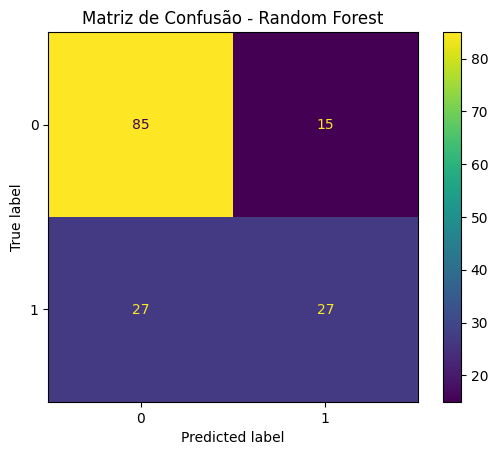

In [18]:
# 7. Gráficos
# Matriz de confusão - Random Forest
ConfusionMatrixDisplay.from_estimator(rf, X_test_num, y_test)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

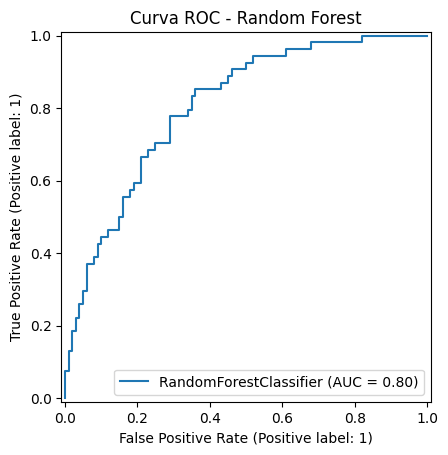

In [20]:
# Curva ROC - Random Forest
RocCurveDisplay.from_estimator(rf, X_test_num, y_test)
plt.title("Curva ROC - Random Forest")
plt.show()